# Yelp Affluence Cluster Model - K-Means 1/14/19
### Britt Allen, Bernard Kurka, Tom Ludlow

This notebook contains the development process for the K-Means Clustering Model, using optimized manual Gridsearch techniques from Notebook 05.  We compare plotted results including Prices and Review counts with coloring for each result cluster.  We also plot to visualize on latitude and longitude.

In [2]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('../Data/nyc_best.csv')

In [34]:
data.head()

zip      city state  cat  pr_1   rv_1  pr_2    rv_2  pr_3   rv_3  pr_4  \
0  10001  New York    NY  NaN    17  20139    64   73672    12  13352     4   
1  10002  New York    NY  NaN    29  26811    64   87914     6   5705     0   
2  10003  New York    NY  NaN    21  28355    64  115635     9  13478     5   
3  10004  New York    NY  NaN    21  38197    52  113225    13  16930     5   
4  10005  New York    NY  NaN    22   4917    61   21109     9   2624     3   

   rv_4    avg_lat   avg_long  
0  6783  40.751380 -73.991945  
1     0  40.719674 -73.989291  
2  7834  40.730335 -73.989247  
3  5147  40.715223 -73.999469  
4  1330  40.706818 -74.008856

In [35]:
data.shape

(280, 14)

In [57]:
data['pr_2m'] = data['pr_2'] * 2
data['pr_3m'] = data['pr_3'] * 3
data['pr_4m'] = data['pr_4'] * 4

In [58]:
data['pr_tot'] = data['pr_1'] + data['pr_2'] + data['pr_3'] + data['pr_4']
data['rv_tot'] = data['rv_1'] + data['rv_2'] + data['rv_3'] + data['rv_4']
data['pr_totm'] = data['pr_1'] + data['pr_2m'] + data['pr_3m'] + data['pr_4m']

In [59]:
ss = StandardScaler()

In [60]:
features = ['pr_1','rv_1','pr_2','pr_2m','rv_2',
            'pr_3','pr_3m','rv_3','pr_4','pr_4m',
            'rv_4','pr_tot','rv_tot','pr_totm'] #,'avg_lat','avg_long']


In [61]:
data_feat_ss = ss.fit_transform(data[features])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
data_feat_ss

array([[-0.47805847,  2.14463923,  0.7805191 , ...,  0.67311299,
         2.33452501,  0.96411533],
       [ 0.46953693,  3.0986292 ,  0.7805191 , ...,  0.73637378,
         2.51041747,  0.61105088],
       [-0.16219334,  3.31939667,  0.7805191 , ...,  0.73637378,
         3.72766707,  0.94806695],
       ...,
       [-1.66255271, -0.7317721 , -1.78734256, ..., -2.20525287,
        -0.7540641 , -2.03693249],
       [-0.00426077, -0.54060234,  0.8233168 , ...,  0.51496102,
        -0.55969805,  0.45056704],
       [-1.2677213 , -0.70932359, -0.88859098, ..., -1.35123223,
        -0.69964703, -1.23451328]])

In [63]:
ss_feat = ['pr_1s','rv_1s','pr_2s','pr_2ms','rv_2s',
           'pr_3s','pr_3ms','rv_3s','pr_4s','pr_4ms',
           'rv_4s','pr_tots','rv_tots','pr_totms']


In [64]:
for col in ss_feat:
    data[col] = 0

In [65]:
data[ss_feat] = data_feat_ss

In [66]:
data.head()

zip      city state  cat  pr_1   rv_1  pr_2    rv_2  pr_3   rv_3  \
0  10001  New York    NY  NaN    17  20139    64   73672    12  13352   
1  10002  New York    NY  NaN    29  26811    64   87914     6   5705   
2  10003  New York    NY  NaN    21  28355    64  115635     9  13478   
3  10004  New York    NY  NaN    21  38197    52  113225    13  16930   
4  10005  New York    NY  NaN    22   4917    61   21109     9   2624   

     ...        rv_2s     pr_3s    pr_3ms     rv_3s     pr_4s    pr_4ms  \
0    ...     2.367155  1.058714  1.058714  1.779857  0.879282  0.879282   
1    ...     2.976908  0.115373  0.115373  0.454949 -0.608939 -0.608939   
2    ...     4.163747  0.587043  0.587043  1.801688  1.251337  1.251337   
3    ...     4.060566  1.215937  1.215937  2.399777  1.251337  1.251337   
4    ...     0.116739  0.587043  0.587043 -0.078861  0.507226  0.507226   

      rv_4s   pr_tots   rv_tots  pr_totms  
0  1.625275  0.673113  2.334525  0.964115  
1 -0.380241  0.736374  2.510417  0.611051  
2  1.936022  0.736374  3.727667  0.948067  
3  1.141562  0.483331  3.950028  0.755486  
4  0.012998  0.609852  0.056766  0.739438  

[5 rows x 34 columns]

In [67]:
data.columns

Index(['zip', 'city', 'state', 'cat', 'pr_1', 'rv_1', 'pr_2', 'rv_2', 'pr_3',
       'rv_3', 'pr_4', 'rv_4', 'avg_lat', 'avg_long', 'pr_2m', 'pr_3m',
       'pr_4m', 'pr_tot', 'rv_tot', 'pr_totm', 'pr_1s', 'rv_1s', 'pr_2s',
       'pr_2ms', 'rv_2s', 'pr_3s', 'pr_3ms', 'rv_3s', 'pr_4s', 'pr_4ms',
       'rv_4s', 'pr_tots', 'rv_tots', 'pr_totms'],
      dtype='object')

In [68]:
features = ['pr_1s','pr_2s','pr_3s','pr_4s','pr_totms']

In [69]:
kmeans = KMeans(n_clusters=4, init='random', algorithm='full', random_state=42, tol=0.0001)
model = kmeans.fit(data[features])

In [70]:
model.cluster_centers_

array([[-0.92293894, -1.47751136, -0.57331066, -0.331208  , -1.52835694],
       [-0.5710632 ,  0.34873792,  1.82736213,  1.97064392,  1.04507051],
       [ 1.24439358,  0.19098086, -0.51352144, -0.49732282,  0.15307012],
       [-0.10152412,  0.90160526, -0.00542103, -0.30948028,  0.60048243]])

In [71]:
data['predicted'] = model.labels_

In [72]:
data.predicted.value_counts(sort=False)

0    71
1    45
2    80
3    82
Name: predicted, dtype: int64

In [ ]:
data[data.predicted==0]

In [ ]:
data[data.predicted==1]

In [ ]:
data[data.predicted==2]

In [ ]:
data[data.predicted==3]

# Plot 10-D Results by Cluster - Raw

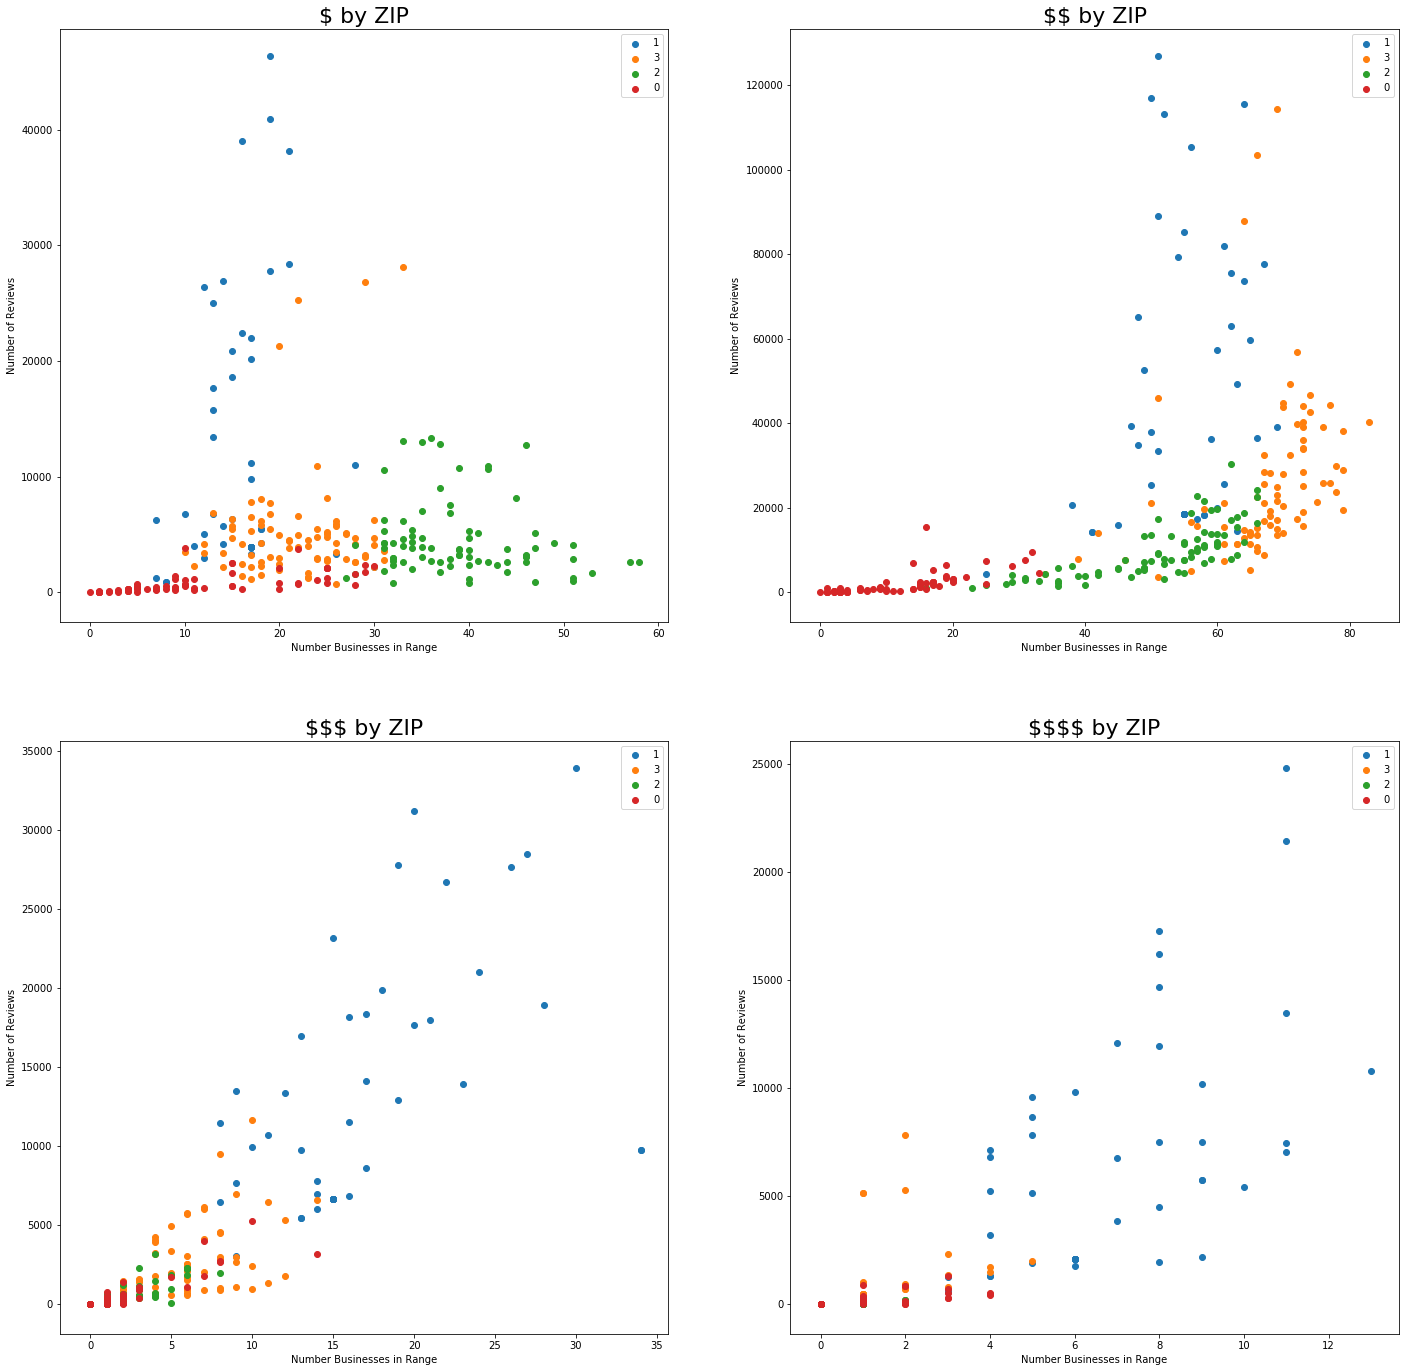

In [77]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.predicted.unique():
    ax[0].scatter(data[data.predicted==i].pr_1, data[data.predicted==i].rv_1, label=str(i))
    ax[1].scatter(data[data.predicted==i].pr_2, data[data.predicted==i].rv_2, label=str(i))
    ax[2].scatter(data[data.predicted==i].pr_3, data[data.predicted==i].rv_3, label=str(i))
    ax[3].scatter(data[data.predicted==i].pr_4, data[data.predicted==i].rv_4, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range')
ax[0].set_ylabel('Number of Reviews')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range')
ax[1].set_ylabel('Number of Reviews')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range')
ax[2].set_ylabel('Number of Reviews')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range')
ax[3].set_ylabel('Number of Reviews')
ax[3].legend()

# Plot 10-D Results by Cluster - Standardized

In [78]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.predicted.unique():
    ax[0].scatter(data[data.predicted==i].pr_1s, data[data.predicted==i].rv_1s, label=str(i))
    ax[1].scatter(data[data.predicted==i].pr_2s, data[data.predicted==i].rv_2s, label=str(i))
    ax[2].scatter(data[data.predicted==i].pr_3s, data[data.predicted==i].rv_3s, label=str(i))
    ax[3].scatter(data[data.predicted==i].pr_4s, data[data.predicted==i].rv_4s, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range (Standardized)')
ax[0].set_ylabel('Number of Reviews (Standardized)')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range (Standardized)')
ax[1].set_ylabel('Number of Reviews (Standardized)')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range (Standardized)')
ax[2].set_ylabel('Number of Reviews (Standardized)')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range (Standardized)')
ax[3].set_ylabel('Number of Reviews (Standardized)')
ax[3].legend()

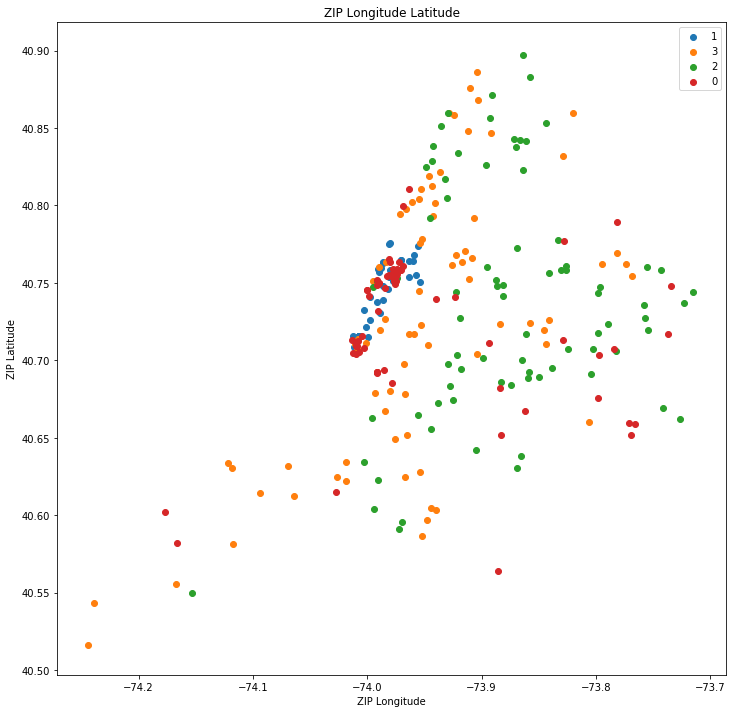

In [79]:
plt.figure(figsize=(12,12))
for i in data.predicted.unique():
    plt.scatter(data[data.predicted==i].avg_long, data[data.predicted==i].avg_lat, label=str(i))

plt.title('ZIP Longitude Latitude')
plt.xlabel('ZIP Longitude')
plt.ylabel('ZIP Latitude')
plt.legend()

# DBSCAN

In [182]:
from sklearn.cluster import DBSCAN

In [372]:
features = ['pr_1s','rv_1s','pr_2ms','rv_2s','pr_3ms','rv_3s','pr_4ms','rv_4s','pr_tots','rv_tots','pr_totms']

In [373]:
data.columns

Index(['zip', 'city', 'state', 'cat', 'pr_1', 'rv_1', 'pr_2', 'rv_2', 'pr_3',
       'rv_3', 'pr_4', 'rv_4', 'avg_lat', 'avg_long', 'predicted', 'pr_1s',
       'rv_1s', 'pr_2s', 'rv_2s', 'pr_3s', 'rv_3s', 'pr_4s', 'rv_4s', 'pr_2m',
       'pr_3m', 'pr_4m', 'pr_2ms', 'pr_3ms', 'pr_4ms', 'db_pred', 'pr_tot',
       'rv_tot', 'pr_totm', 'pr_tots', 'rv_tots', 'pr_totms', 'ac_pred'],
      dtype='object')

In [383]:
dbscan = DBSCAN(eps=.3, min_samples=3).fit(data[features])

In [384]:
data['db_pred'] = dbscan.labels_

In [385]:
data.db_pred.value_counts(sort=False)

-1    44
 0     3
 2    17
 1     4
Name: db_pred, dtype: int64

# Plot 10-D DBSCAN Results by Cluster - Raw

In [386]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.db_pred.unique():
    ax[0].scatter(data[data.db_pred==i].pr_1, data[data.db_pred==i].rv_1, label=str(i))
    ax[1].scatter(data[data.db_pred==i].pr_2, data[data.db_pred==i].rv_2, label=str(i))
    ax[2].scatter(data[data.db_pred==i].pr_3, data[data.db_pred==i].rv_3, label=str(i))
    ax[3].scatter(data[data.db_pred==i].pr_4, data[data.db_pred==i].rv_4, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range')
ax[0].set_ylabel('Number of Reviews')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range')
ax[1].set_ylabel('Number of Reviews')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range')
ax[2].set_ylabel('Number of Reviews')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range')
ax[3].set_ylabel('Number of Reviews')
ax[3].legend()

# Plot 10-D DBSCAN Results by Cluster - Standardized

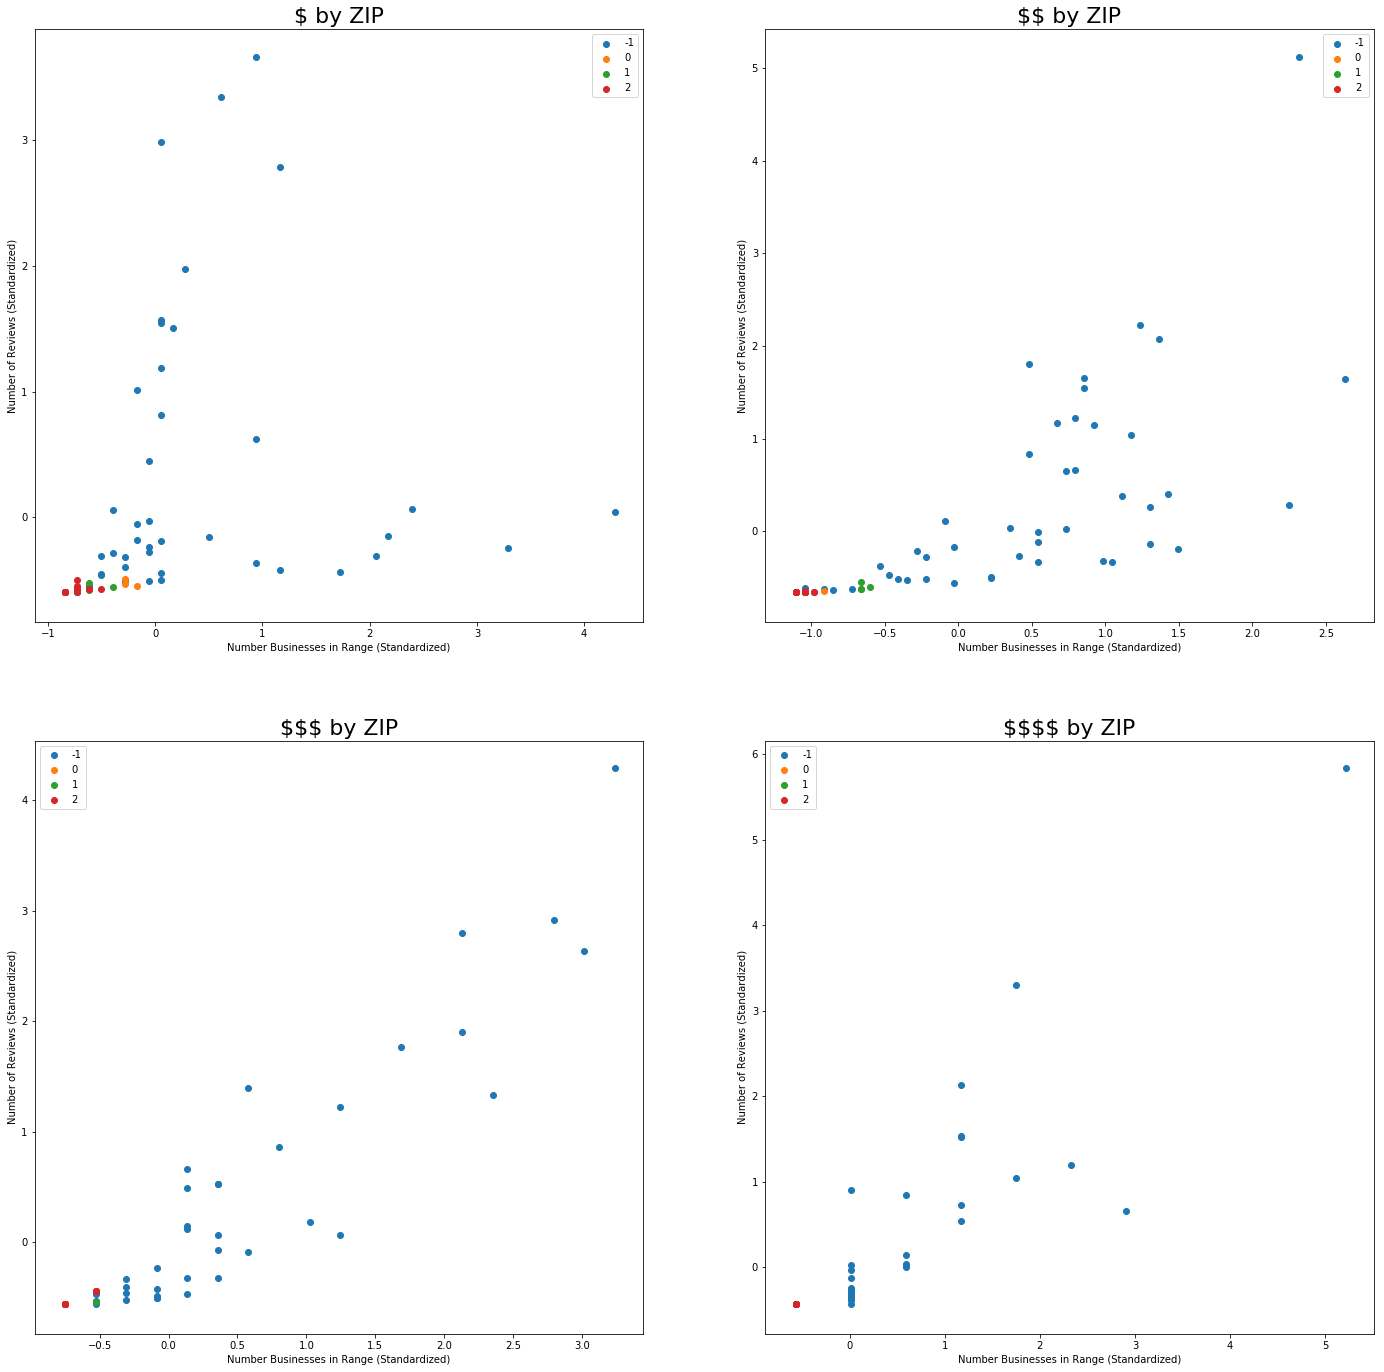

In [387]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.db_pred.unique():
    ax[0].scatter(data[data.db_pred==i].pr_1s, data[data.db_pred==i].rv_1s, label=str(i))
    ax[1].scatter(data[data.db_pred==i].pr_2s, data[data.db_pred==i].rv_2s, label=str(i))
    ax[2].scatter(data[data.db_pred==i].pr_3s, data[data.db_pred==i].rv_3s, label=str(i))
    ax[3].scatter(data[data.db_pred==i].pr_4s, data[data.db_pred==i].rv_4s, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range (Standardized)')
ax[0].set_ylabel('Number of Reviews (Standardized)')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range (Standardized)')
ax[1].set_ylabel('Number of Reviews (Standardized)')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range (Standardized)')
ax[2].set_ylabel('Number of Reviews (Standardized)')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range (Standardized)')
ax[3].set_ylabel('Number of Reviews (Standardized)')
ax[3].legend()

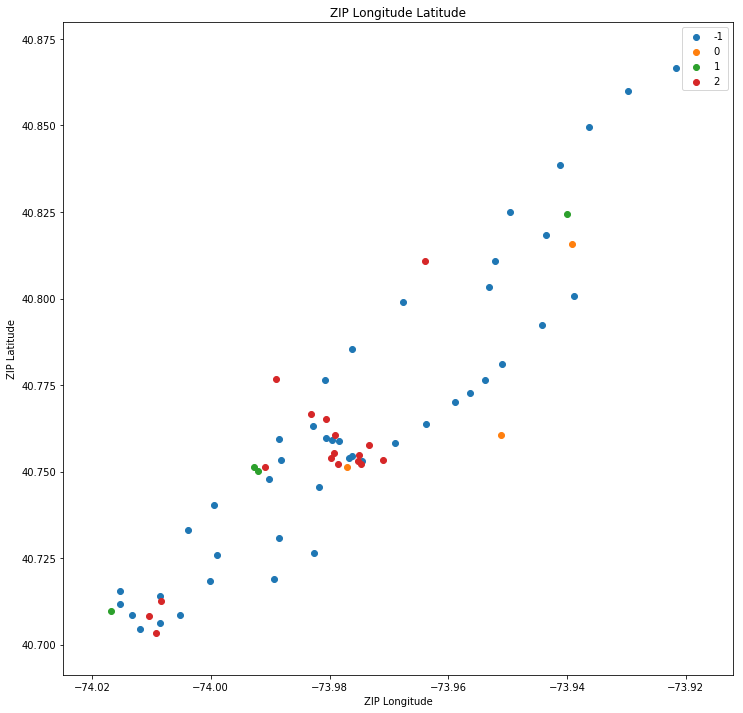

In [388]:
plt.figure(figsize=(12,12))
for i in data.db_pred.unique():
    plt.scatter(data[data.db_pred==i].avg_long, data[data.db_pred==i].avg_lat, label=str(i))

plt.title('ZIP Longitude Latitude')
plt.xlabel('ZIP Longitude')
plt.ylabel('ZIP Latitude')
plt.legend()

In [ ]:
data[data.db_pred==0]

In [354]:
from sklearn.cluster import AgglomerativeClustering

In [355]:
ac = AgglomerativeClustering(n_clusters=5)

In [356]:
ac.fit(data[features])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [357]:
data['ac_pred'] = ac.labels_

In [358]:
data.head()

zip      city state   cat  pr_1   rv_1  pr_2   rv_2  pr_3  rv_3   ...     \
0  10001  New York    NY  none     8   9740    28  29095     4  5507   ...      
1  10002  New York    NY  none    18  15201    39  43425     4  4740   ...      
2  10003  New York    NY  none    16  19139    54  91952     6  8836   ...      
3  10004  New York    NY  none    12   1980    26  10361     6  2128   ...      
4  10005  New York    NY  none     7   1425    11   2268     1    89   ...      

     pr_3ms    pr_4ms  db_pred  pr_tot  rv_tot  pr_totm   pr_tots   rv_tots  \
0  0.136806 -0.570280       -1      40   44342       76  0.427901  1.132551   
1  0.136806 -0.570280       -1      61   63366      108  1.269557  1.906693   
2  0.579795  1.166095       -1      79  125052      154  1.990977  4.416876   
3  0.579795  0.587303       -1      46   15622       90  0.668374 -0.036150   
4 -0.527679  0.008512        0      20    3959       36 -0.373677 -0.510751   

   pr_totms  ac_pred  
0  0.401703        1  
1  1.060410        1  
2  2.007302        1  
3  0.689887        3  
4 -0.421682        2  

[5 rows x 37 columns]

In [359]:
data.ac_pred.value_counts(sort=False)

0     7
1     6
2    33
3    16
4     6
Name: ac_pred, dtype: int64

# Plot 10-D Agglomerative Clustering Results by Cluster - Raw

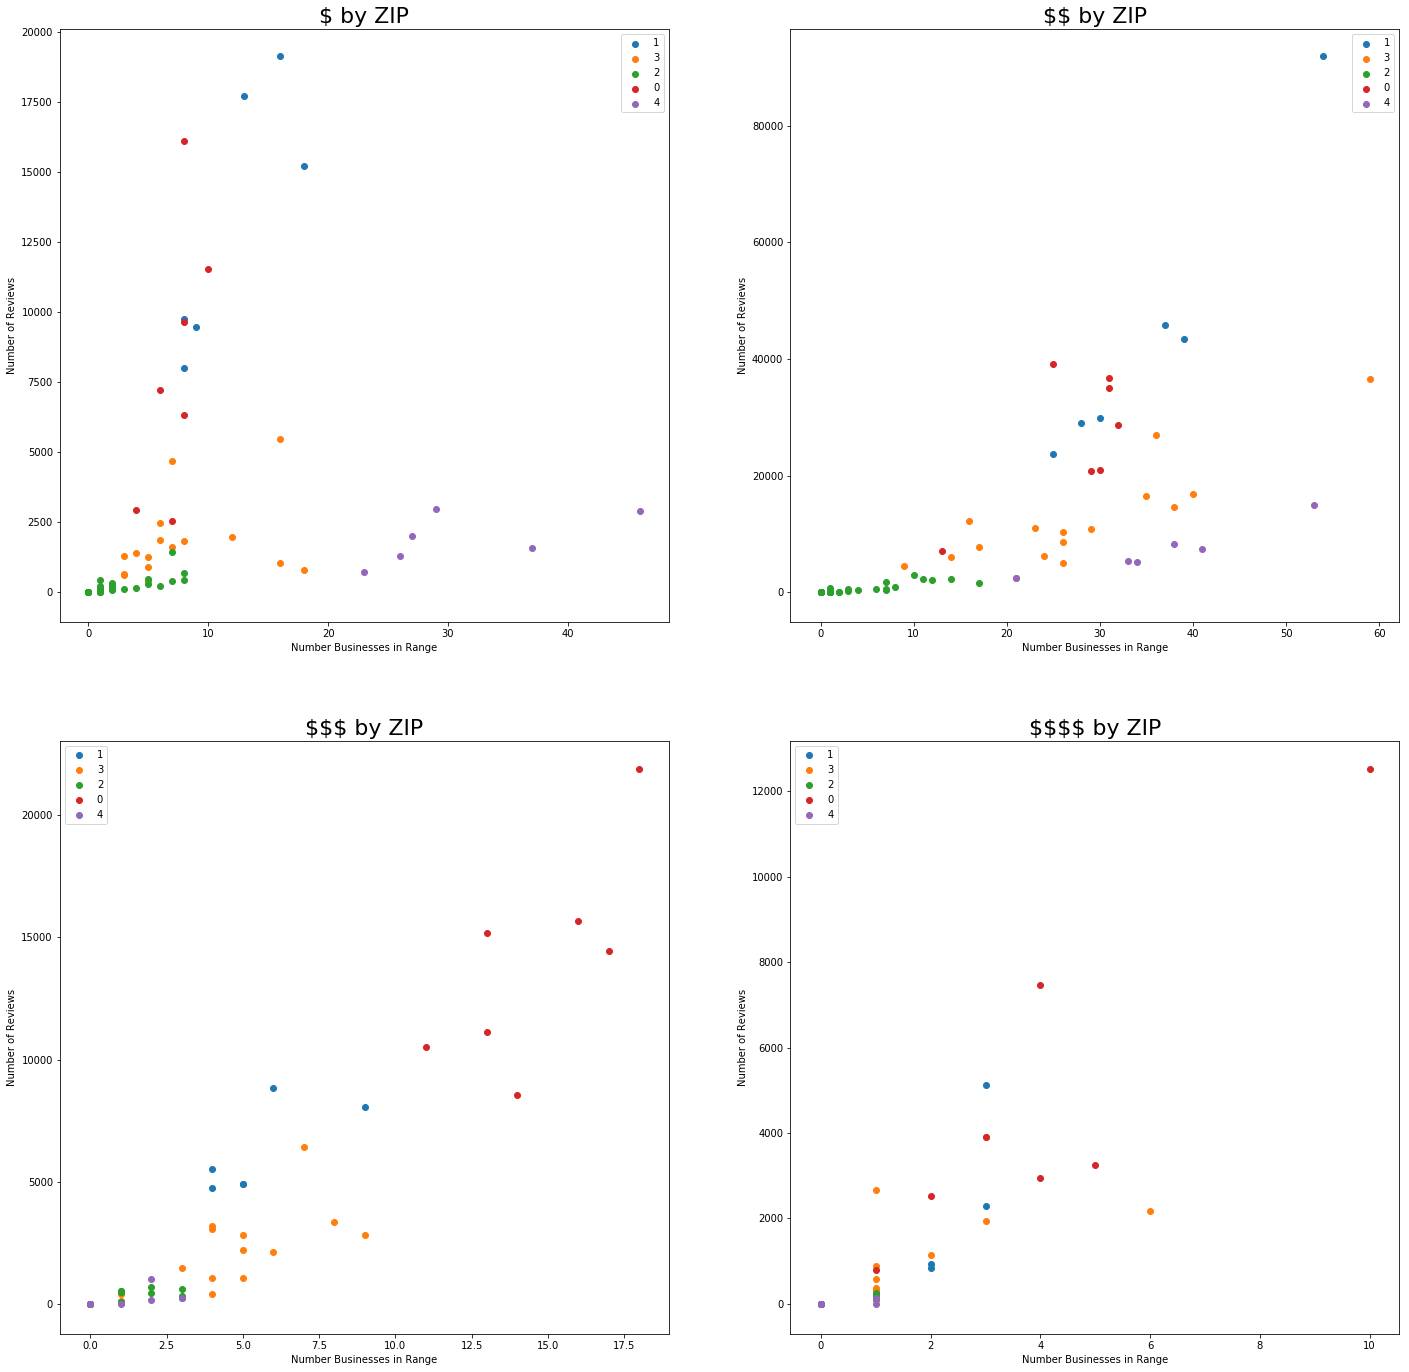

In [361]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.ac_pred.unique():
    ax[0].scatter(data[data.ac_pred==i].pr_1, data[data.ac_pred==i].rv_1, label=str(i))
    ax[1].scatter(data[data.ac_pred==i].pr_2, data[data.ac_pred==i].rv_2, label=str(i))
    ax[2].scatter(data[data.ac_pred==i].pr_3, data[data.ac_pred==i].rv_3, label=str(i))
    ax[3].scatter(data[data.ac_pred==i].pr_4, data[data.ac_pred==i].rv_4, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range')
ax[0].set_ylabel('Number of Reviews')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range')
ax[1].set_ylabel('Number of Reviews')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range')
ax[2].set_ylabel('Number of Reviews')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range')
ax[3].set_ylabel('Number of Reviews')
ax[3].legend()

# Plot 10-D Agglomerative Clustering Results by Cluster - Standardized

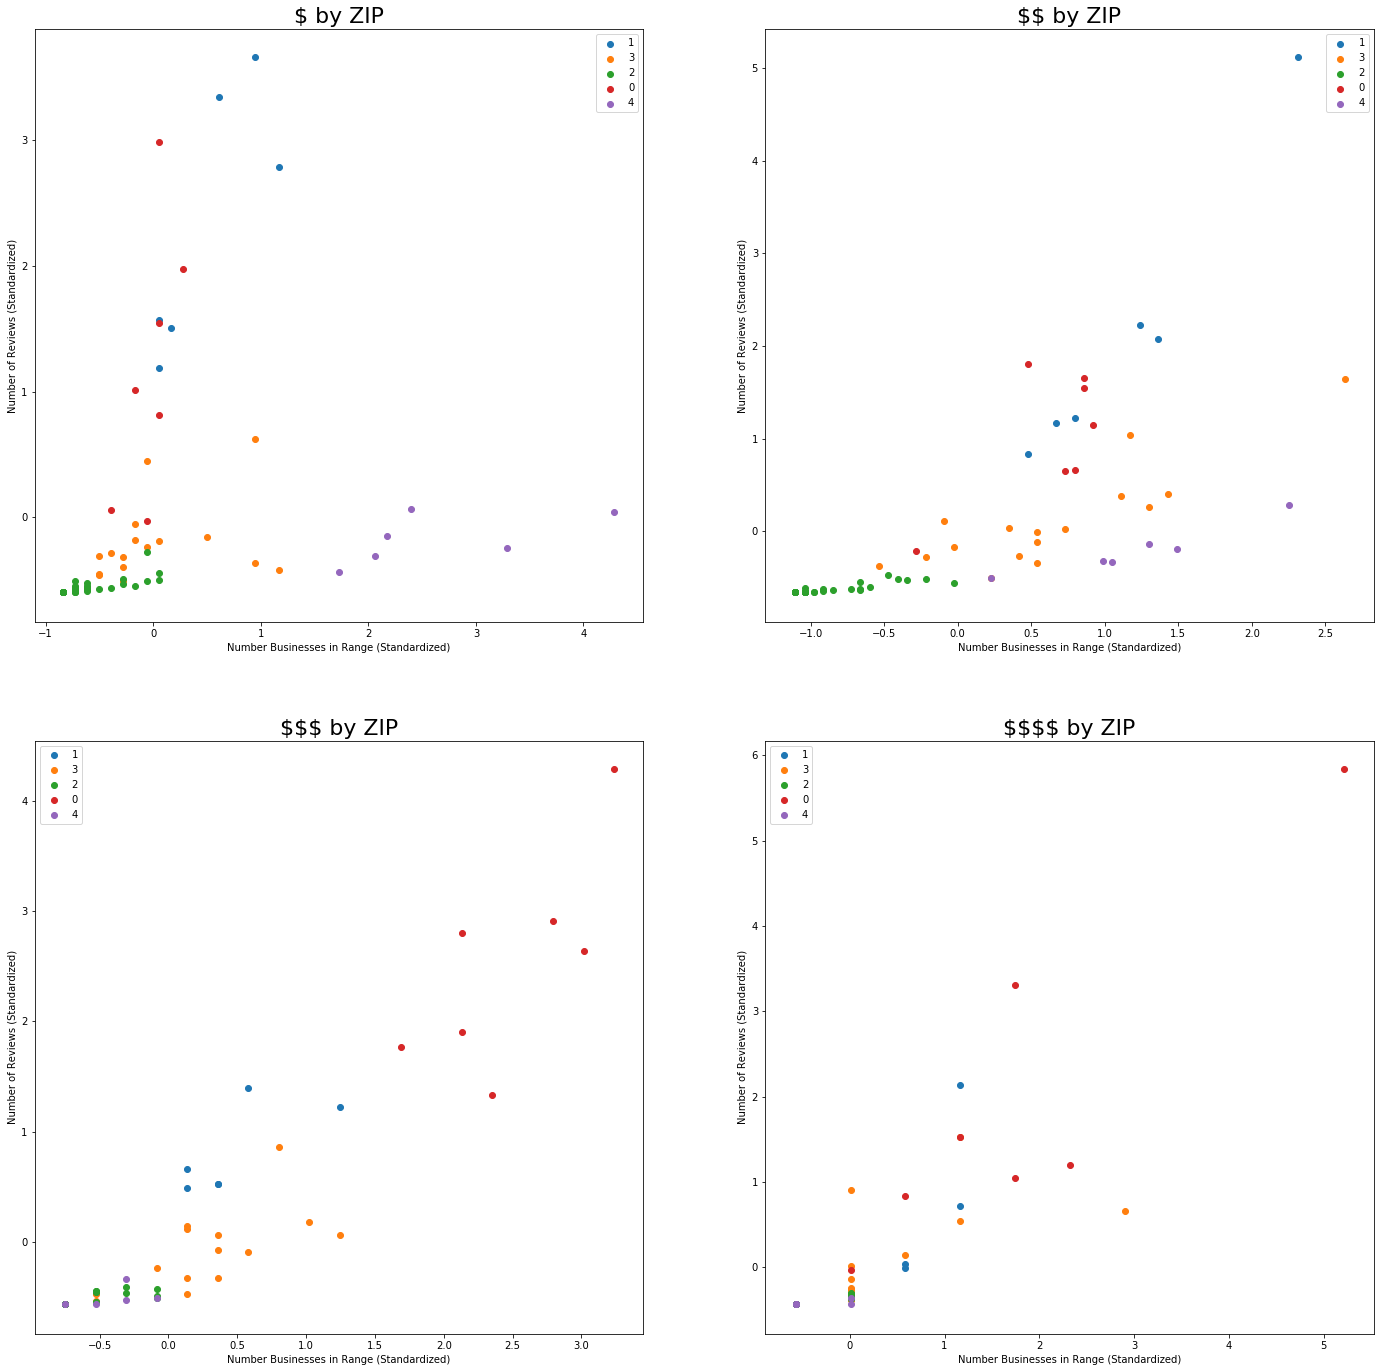

In [362]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.ac_pred.unique():
    ax[0].scatter(data[data.ac_pred==i].pr_1s, data[data.ac_pred==i].rv_1s, label=str(i))
    ax[1].scatter(data[data.ac_pred==i].pr_2s, data[data.ac_pred==i].rv_2s, label=str(i))
    ax[2].scatter(data[data.ac_pred==i].pr_3s, data[data.ac_pred==i].rv_3s, label=str(i))
    ax[3].scatter(data[data.ac_pred==i].pr_4s, data[data.ac_pred==i].rv_4s, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range (Standardized)')
ax[0].set_ylabel('Number of Reviews (Standardized)')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range (Standardized)')
ax[1].set_ylabel('Number of Reviews (Standardized)')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range (Standardized)')
ax[2].set_ylabel('Number of Reviews (Standardized)')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range (Standardized)')
ax[3].set_ylabel('Number of Reviews (Standardized)')
ax[3].legend()

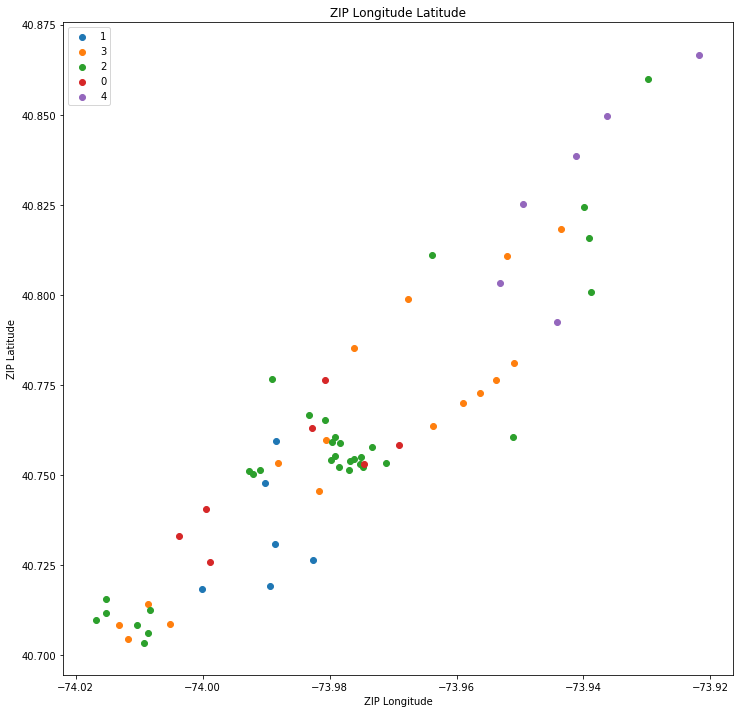

In [363]:
plt.figure(figsize=(12,12))
for i in data.ac_pred.unique():
    plt.scatter(data[data.ac_pred==i].avg_long, data[data.ac_pred==i].avg_lat, label=str(i))

plt.title('ZIP Longitude Latitude')
plt.xlabel('ZIP Longitude')
plt.ylabel('ZIP Latitude')
plt.legend()

# Model Exploration

In [389]:
data.columns

Index(['zip', 'city', 'state', 'cat', 'pr_1', 'rv_1', 'pr_2', 'rv_2', 'pr_3',
       'rv_3', 'pr_4', 'rv_4', 'avg_lat', 'avg_long', 'predicted', 'pr_1s',
       'rv_1s', 'pr_2s', 'rv_2s', 'pr_3s', 'rv_3s', 'pr_4s', 'rv_4s', 'pr_2m',
       'pr_3m', 'pr_4m', 'pr_2ms', 'pr_3ms', 'pr_4ms', 'db_pred', 'pr_tot',
       'rv_tot', 'pr_totm', 'pr_tots', 'rv_tots', 'pr_totms', 'ac_pred'],
      dtype='object')

In [396]:
features = ['pr_1s','pr_2ms','pr_3ms','pr_4ms']

In [397]:
ac.fit(data[features])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [398]:
data['ac_pred_1'] = ac.labels_

In [399]:
data.ac_pred_1.value_counts()

3    33
0    17
2    10
1     7
4     1
Name: ac_pred_1, dtype: int64

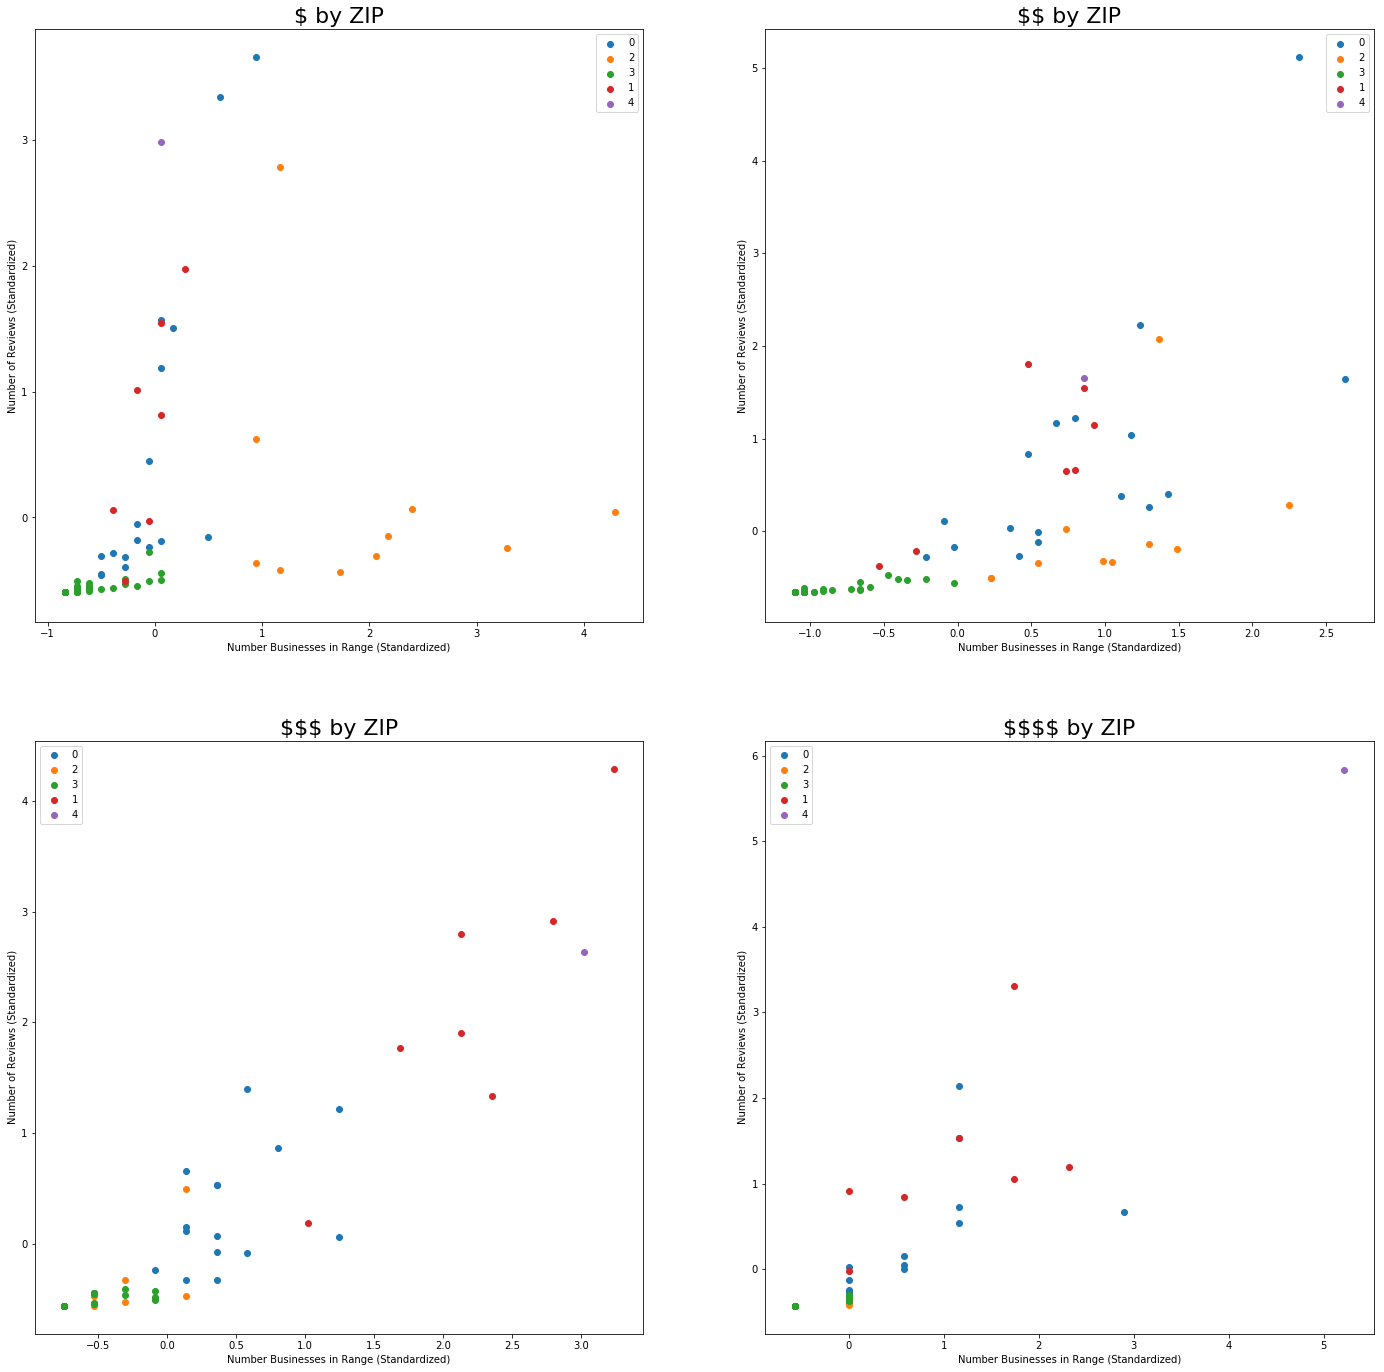

In [400]:
fig, ax = plt.subplots(2,2,figsize=(24,24),sharey=False)
ax = ax.ravel()

for i in data.ac_pred_1.unique():
    ax[0].scatter(data[data.ac_pred_1==i].pr_1s, data[data.ac_pred_1==i].rv_1s, label=str(i))
    ax[1].scatter(data[data.ac_pred_1==i].pr_2s, data[data.ac_pred_1==i].rv_2s, label=str(i))
    ax[2].scatter(data[data.ac_pred_1==i].pr_3s, data[data.ac_pred_1==i].rv_3s, label=str(i))
    ax[3].scatter(data[data.ac_pred_1==i].pr_4s, data[data.ac_pred_1==i].rv_4s, label=str(i))

#ax[0].scatter(data.pr_1, data.rv_1)
ax[0].set_title('\$ by ZIP', fontsize=22)
ax[0].set_xlabel('Number Businesses in Range (Standardized)')
ax[0].set_ylabel('Number of Reviews (Standardized)')
ax[0].legend()

#ax[1].scatter(data.pr_2, data.rv_2)
ax[1].set_title('\$$ by ZIP', fontsize=22)
ax[1].set_xlabel('Number Businesses in Range (Standardized)')
ax[1].set_ylabel('Number of Reviews (Standardized)')
ax[1].legend()

#ax[2].scatter(data.pr_3, data.rv_3)
ax[2].set_title('\$\$$ by ZIP', fontsize=22)
ax[2].set_xlabel('Number Businesses in Range (Standardized)')
ax[2].set_ylabel('Number of Reviews (Standardized)')
ax[2].legend()

#ax[3].scatter(data.pr_3, data.rv_3)
ax[3].set_title('\$\$\$$ by ZIP', fontsize=22)
ax[3].set_xlabel('Number Businesses in Range (Standardized)')
ax[3].set_ylabel('Number of Reviews (Standardized)')
ax[3].legend()

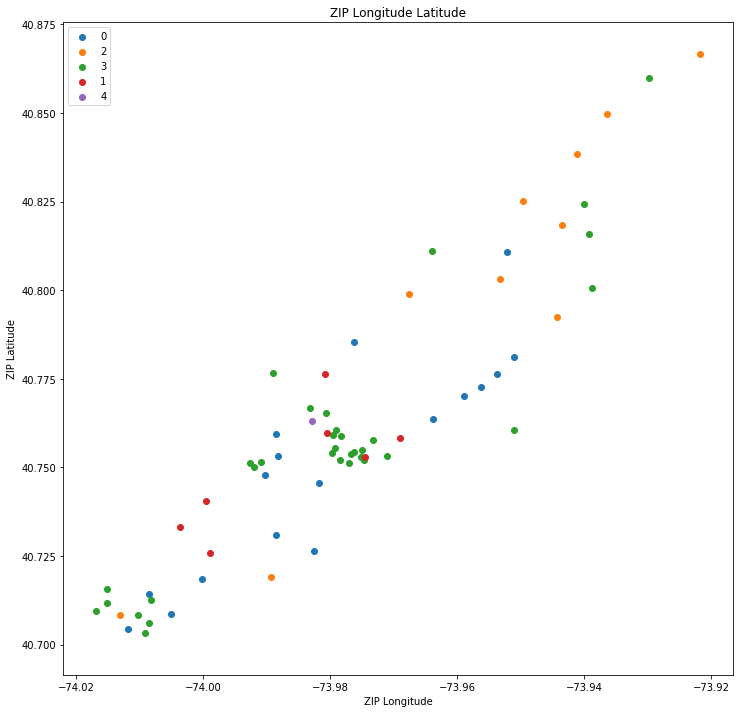

In [401]:
plt.figure(figsize=(12,12))
for i in data.ac_pred_1.unique():
    plt.scatter(data[data.ac_pred_1==i].avg_long, data[data.ac_pred_1==i].avg_lat, label=str(i))

plt.title('ZIP Longitude Latitude')
plt.xlabel('ZIP Longitude')
plt.ylabel('ZIP Latitude')
plt.legend()